
# Adding the Libraries for the CNN model

In [2]:
import numpy as np
import os 
import tensorflow as tf
import random
import pandas as pd
import cv2 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Importing the datasets 
<P>To begin, I started by importing both the COVID and NONCOVID CT scans into the notebook.

I also checked the size of each and noticed that they were not equal. 

To fix this issue, I used the **Random** library to create  random samples  from both image collections.

For the CNN model there will be *4000* CT scans for both COVID and NONCOIVD datasets </P>


In [3]:
NONCOVID_CT_SCANS = os.listdir("1NonCOVID")
COVID_CT_SCANS = os.listdir("2COVID")


print(np.size(NONCOVID_CT_SCANS))
print(np.size(COVID_CT_SCANS))
#Number of Negative COVID CT Scans:  6893
#Number of Positive COVID CT Scans:  7593

NONCOVID_CT_SAMPLE = random.sample(NONCOVID_CT_SCANS, 6000)
COVID_CT_SAMPLE = random.sample(COVID_CT_SCANS, 6000)



print(np.size(NONCOVID_CT_SAMPLE))
print(np.size(COVID_CT_SAMPLE))

#Number of Positive COVID CT Scans:  6000
#Number of Negative COVID CT Scans:  6000



6893
7593
6000
6000


# Preprocessing Data



Reducing the size of each CT scan to  decrease memory and computing needs.

In [4]:
NONCOVID_IMAGES = []
COVID_IMAGES = []

for img_name in NONCOVID_CT_SAMPLE:
      image = cv2.imread("1NonCOVID" + '/' + img_name, 1)
      image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
      NONCOVID_IMAGES.append(np.array(image))

for img_name in COVID_CT_SAMPLE:
    image = cv2.imread("2COVID" + '/'+ img_name ,1)
    image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    COVID_IMAGES.append(np.array(image))



Picking out a CT Scan of both COVID and NONCOVID and showing what they look like 

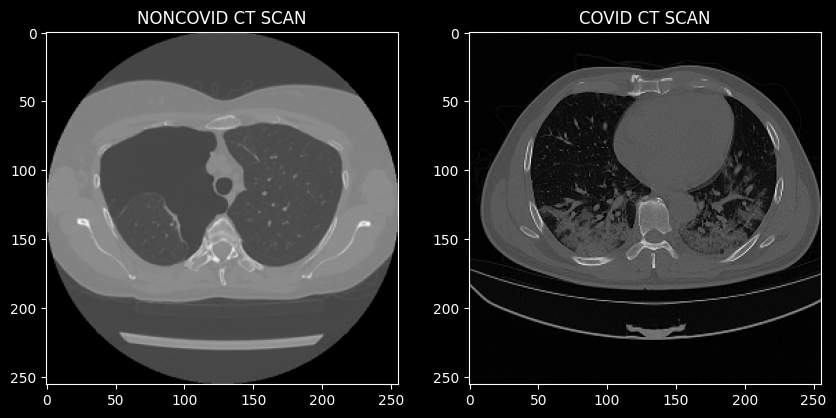

In [5]:

plot, aux  = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
aux[0].imshow(np.uint8(NONCOVID_IMAGES[0]))
aux[0].set_title("NONCOVID CT SCAN")
aux[1].imshow(np.uint8(COVID_IMAGES[0]))
aux[1].set_title("COVID CT SCAN")
plt.show()

In [6]:
print(np.shape(NONCOVID_IMAGES[0]))
print(np.shape(COVID_IMAGES[0]))

(256, 256, 3)
(256, 256, 3)


Adding Both **NON-COVID** and **COVID** datasets together for the CNN model. 

Creating a new array for labeling the final processed data, 1 for COVID and 0 for NONCOVID

In [7]:

MODEL_IMAGES = COVID_IMAGES + NONCOVID_IMAGES

MODEL_IMAGES_LABELS = np.concatenate((np.zeros(len(NONCOVID_IMAGES)), np.ones(len(COVID_IMAGES))), axis=None, dtype=np.float32)

NONCOVID_IMAGES = []
COVID_IMAGES = []


# Building The CNN Model

Spliting the final data into training and testing datasets. 

I decided to use a **80/20** split, as this is proven to be best for model performance and reliabilty 

In total this model uses **10000** images for the training, and **2000** for the testing.
 
The model will also use **1000** images from the training set for validating each epoch of the model.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_Test, Y_train, Y_Test = train_test_split(MODEL_IMAGES, MODEL_IMAGES_LABELS, test_size=0.2,  shuffle=True)

In [9]:
from keras.applications import ResNet50
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet', pooling='max', input_shape=(256,256,3)))
model.add(Dense(512))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 24,584,193
Non-trainable params: 53,120
_________________________________________________________________


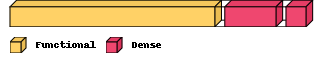

In [10]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [11]:
#10% Of the training data is used as vaidation data.

fittedmodel = model.fit(x = np.asarray(X_train),
                        y = Y_train,
                        batch_size = 30,
                        verbose = 1,
                        validation_split=0.125,
                        epochs = 15
                        
                        )

Epoch 1/15
280/280 [==============================] - 57s 160ms/step - loss: 0.8703 - acc: 0.7964 - val_loss: 0.9446 - val_acc: 0.7250
Epoch 2/15
280/280 [==============================] - 44s 157ms/step - loss: 0.3493 - acc: 0.8960 - val_loss: 0.4629 - val_acc: 0.8617
Epoch 3/15
280/280 [==============================] - 44s 156ms/step - loss: 0.1844 - acc: 0.9367 - val_loss: 0.3638 - val_acc: 0.8808
Epoch 4/15
280/280 [==============================] - 44s 156ms/step - loss: 0.1187 - acc: 0.9565 - val_loss: 0.2474 - val_acc: 0.9217
Epoch 5/15
280/280 [==============================] - 44s 156ms/step - loss: 0.0818 - acc: 0.9694 - val_loss: 0.2345 - val_acc: 0.9283
Epoch 6/15
280/280 [==============================] - 44s 156ms/step - loss: 0.0497 - acc: 0.9814 - val_loss: 0.2504 - val_acc: 0.9217
Epoch 7/15
280/280 [==============================] - 44s 156ms/step - loss: 0.0416 - acc: 0.9863 - val_loss: 0.2104 - val_acc: 0.9275
Epoch 8/15
280/280 [==============================] - 4

# Plotting the performance of the Model

C:\Users\johnc\AppData\Local\Temp\ipykernel_35388\841047483.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show()


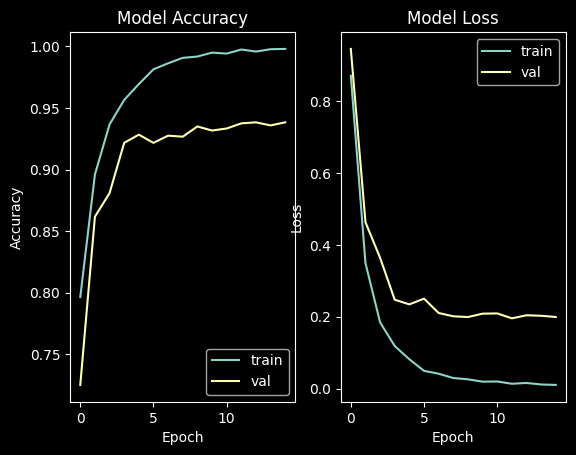

In [12]:
plot, aux = plt.subplots(ncols=2)

aux[0].plot(fittedmodel.history['acc'])
aux[0].plot(fittedmodel.history['val_acc'])
aux[0].set_title('Model Accuracy')
aux[0].set_ylabel('Accuracy')
aux[0].set_xlabel('Epoch')
aux[0].legend(['train', 'val'], loc='lower right')

aux[1].plot(fittedmodel.history['loss'])
aux[1].plot(fittedmodel.history['val_loss'])
aux[1].set_title('Model Loss')
aux[1].set_ylabel('Loss')
aux[1].set_xlabel('Epoch')
aux[1].legend(['train', 'val'], loc='upper right')
plot.show()



 # Testing the Model's Predictions

In [13]:
testimage = os.listdir(path="testimgs")
covidtestimage = os.listdir(path="covidtestimgs")
testimgs = []
covidtestimgs = []
totalresults = []
for img in testimage:
    image = cv2.imread("testimgs" + '/'+ img ,1)
    image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    testimgs.append(np.array(image))
for img in covidtestimage:
    image = cv2.imread("covidtestimgs" + '/'+ img ,1)
    image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    covidtestimgs.append(np.array(image))



nontestimage = np.expand_dims(testimgs[2], axis=0)
nontestimage2 = np.expand_dims(testimgs[3], axis=0)
covidtestimage = np.expand_dims(covidtestimgs[0], axis=0)
covidtestimage2 = np.expand_dims(covidtestimgs[1], axis=0)


### Testing 2 NONCOVID PICS
predict1 = model.predict(nontestimage)
predict2 = model.predict(nontestimage2)
totalresults.append(predict1)
totalresults.append(predict2)

# TESTING 2 COVID PICS
cpredict1 = model.predict(covidtestimage)
cpredict2 = model.predict(covidtestimage2)
totalresults.append(cpredict1)
totalresults.append(cpredict2)

totalresults2 = np.array(totalresults)
totalresults2 = totalresults2.astype(np.float32)

# higher band(over 0.5 )    = NONCOVID
# lower band(0.5 or under)  = COVID
for i in totalresults2:
   

    if i >= 0.5:
        print("Prediction = " + str(i) + " / NONCOVID")
    elif i < 0.5:
        print("Prediction = " + str(i) + " / COVID")


1/1 [==============================] - 0s 28ms/step
Prediction = [[1.]] / NONCOVID
Prediction = [[0.9999211]] / NONCOVID
Prediction = [[0.00207195]] / COVID
Prediction = [[0.00034392]] / COVID


75/75 [==============================] - 3s 40ms/step
              precision    recall  f1-score   support

    NONCOVID       0.95      0.95      0.95      1212
       COVID       0.95      0.94      0.95      1188

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



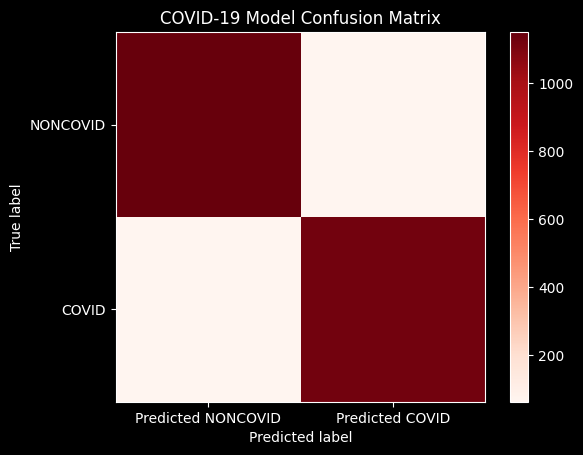

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

model.evaluate(x = np.asarray(X_Test),
                   y = Y_Test,
                   verbose=1)

test_predict = model.predict(x = np.asarray(X_Test))


for i in range(len(test_predict)):
    if test_predict[i] >= 0.5:
        test_predict[i] = 1
    elif test_predict[i] < 0.5:
        test_predict[i] = 0

classes = ['NONCOVID', 'COVID']
report = classification_report(y_true = Y_Test,
                      y_pred = test_predict,
                      target_names = classes)
print(classification_report(y_true = Y_Test,
                      y_pred = test_predict,
                      target_names = classes))

cm = confusion_matrix(y_true=Y_Test, y_pred=test_predict)

plt.imshow(cm, cmap=plt.cm.Reds)
plt.title('COVID-19 Model Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted NONCOVID', 'Predicted COVID'])
plt.yticks([0, 1], ['NONCOVID', 'COVID'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Saving the Model for GUI Implemtation


In [ ]:
model.save('COVID_CNN_MODEL')

INFO:tensorflow:Assets written to: COVID_CNN_MODEL\assets


INFO:tensorflow:Assets written to: COVID_CNN_MODEL\assets
